# Training a sentiment analysis classifier based on supervised machine learning algorithms

In [1]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
    
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [5]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/11_E2ngsEOyTQwbwVVRHY5urzFF95BQCV/edit#gid=1788161364
tweets_df = pd.read_csv('./data/dataset/dataset_30.csv', sep = ',')

In [6]:
tweets_df.shape

(194, 4)

In [7]:
tweets_df.head()

,Unnamed: 0,full_text,sentiment,emotion
0,144,@NilsonJavierB @eliecer_e @CNE_COLOMBIA @moecolombia @DELAESPRIELLAE @AndresPastrana_ @PalomaValenciaL @RevistaSemana @CConstitucional @CorteSupremaJ @DefensoriaCol @USEmbassyBogota @felipesancheztv @consejodeestado Vega lo que debe es ir preso y anulación de esas elecciones.,negative,anger
1,326,"Amor por Colombia ni que nada, sólo por la familia acá porque del resto este país no se saca con amor ni patriotismo. Toca es irse para no ser un muerto más, empezó la época de elecciones y en la Costa ya iniciaron, me duele 💔",negative,NaN
2,35,(Elecciones Colombia: ¿qué muestran las más recientes encuestas presidenciales?) publicado en https://t.co/XJ7xIbDAXM - https://t.co/kBmI6ABhaM https://t.co/Qp16PJZguR,neutral,fear
3,386,"@RobinsonBaena Mosca camarada, el uribismo aprovechando las acciones de estos delincuentes quieren desestabilizar Colombia porque se ven perdidos en las elecciones https://t.co/ZN08tBGBax",NaN,NaN
4,65,"@montanertwiter Te pido que ores con todo tu corazón por el bien de Colombia, para que no nos caigamos en desgracia en las próximas elecciones. Gracias 🙏🏼",positive,joy


In [8]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.402062
NaN         0.396907
neutral     0.164948
positive    0.036082
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [9]:
# Removing  unlabeled tweets
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [10]:
tweets_labeled_df.shape

(117, 4)

In [11]:
tweets_unlabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [12]:
tweets_unlabeled_df.shape

(77, 4)

In [13]:
# Scenario 1: Working with all classes

# Scenario 2: Working only with positive and negative classes
# Removing neutral class
#tweets_labeled_df = tweets_labeled_df.loc[tweets_labeled_df['sentiment'].isin(['positive', 'negative'])]

# Scenario 3: Treating neutral as positive classes
# tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment'].replace({'neutral': 'positive'})

### Splitting train and test datasets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [15]:
X_train.shape

(93,)

In [16]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.666667
neutral     0.268817
positive    0.064516
Name: sentiment, dtype: float64

In [17]:
X_test.shape

(24,)

In [18]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.666667
neutral     0.291667
positive    0.041667
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="./imgs/bow.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [19]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [20]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [21]:
X_bow = bow.fit_transform(X_train)

In [22]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [23]:
#model = DecisionTreeClassifier(max_depth=9)

In [24]:
#model = RandomForestClassifier(max_depth=9,n_estimators=300)

In [25]:
#model = SVC(kernel='rbf', degree=3, gamma='scale')

In [26]:
#model = KNeighborsClassifier(n_neighbors=5)

In [27]:
#model = MultinomialNB()

In [29]:
model = MLPClassifier(hidden_layer_sizes=(200, 200, 200))

In [30]:
model.fit(X_bow, y_train)

MLPClassifier(hidden_layer_sizes=(200, 200, 200))

In [31]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

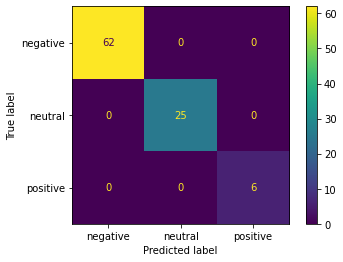

In [32]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

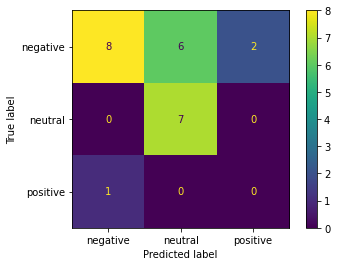

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [34]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_bow_predict, labels='positive', average = None, zero_division=0))
print('Recall:', recall_score(y_test, y_test_bow_predict, labels='positive', average = None))
print('F1:', f1_score(y_test, y_test_bow_predict, labels='positive', average = None))

Precision: [0.         0.88888889 0.53846154]
Recall: [0.  0.5 1. ]
F1: [0.   0.64 0.7 ]


In [35]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: [0.88888889 0.53846154 0.        ]
Recall: [0.5 1.  0. ]
F1: [0.64 0.7  0.  ]


### Training and evaluating a model using TF-IDF

In [36]:
model = RandomForestClassifier()

In [37]:
model = KNeighborsClassifier(n_neighbors=3)

In [38]:
model.fit(X_tfidf, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [ ]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, labels = ['negative'], average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, labels = ['negative'], average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, labels = ['negative'], average = None))

In [ ]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

### How interpret the results?

<table>
    <tbody>
        <tr>
            <td>
                <img src="./imgs/confusion-matrix.png" style="height: 400px;">
            </td>
            <td>
                <img src="./imgs/precision-recall.png" style="height: 600px;">
            </td>
        </tr>
    </tbody>
</table>

### Analyzing errors

In [ ]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [ ]:
error_df.shape

In [ ]:
len(error_df.loc[error_df['actual'] != error_df['predicted']].head(100))